In [1]:
d = 2.2
c = 0.2
k = 0.98
b = 0
pricefactor = 0.45

def profit(qSelf, qOther):
    return k * ( (d - qSelf - qOther)*qSelf - c * qSelf**2) + b

def price(q1, q2):
    return d - q1 - q2

# In a 4 oligopoly
print("  Model  |     Unit qty    |   Total quantity   |      Price     |    Unit Profit   |  Total Profit")

q_comp4 = d / (4+2*c)
q_cournot4 = d / (5 + 2 * c)

Q_comp4 = 4 * q_comp4
p_comp4 = price(q_comp4*2, q_comp4*2)
profit_comp4 = profit(q_comp4, 3*q_comp4)

print("Comp      ", q_comp4, Q_comp4, p_comp4, profit_comp4, profit_comp4*4)

Q_cournot4 = 4 * q_cournot4
p_cournot4 = price(q_cournot4*2, q_cournot4*2)
profit_cournot4 = profit(q_cournot4, 3*q_cournot4)
print("Cournot   ", q_cournot4, Q_cournot4, p_cournot4, profit_cournot4, profit_cournot4*4)

q_cartel4 = d / (2 * (4+c))
p_cartel4 = price(q_cartel4, q_cartel4*3)
profit_cartel4 = profit(q_cartel4, 3*q_cartel4)
print("Cartel    ", q_cartel4, 4*q_cartel4, p_cartel4, profit_cartel4, profit_cartel4*4)


  Model  |     Unit qty    |   Total quantity   |      Price     |    Unit Profit   |  Total Profit
Comp       0.5 2.0 0.20000000000000018 0.049000000000000085 0.19600000000000034
Cournot    0.40740740740740744 1.6296296296296298 0.5703703703703704 0.1951934156378601 0.7807736625514404
Cartel     0.2619047619047619 1.0476190476190477 1.1523809523809525 0.2823333333333334 1.1293333333333335


In [2]:
import numpy as np

values = {}
valDat = np.zeros((100, 100))
for i in range(1, 1000):
    incr = i # 1000-i
    for j in range(1, 1000):
        values[(incr, j*4)] = profit(incr/1000, (j/1000)*4)
        if incr %10 == 0 & j%10== 0:
            valDat[(int)(incr/10), (int)(j/10)] = profit(incr/1000, (j/1000))

maxelem = max(values, key = lambda k: values[k])
minelem = min(values, key = lambda k: values[k])

print ("Max Profit : ", [x/1000 for x in maxelem], values[maxelem])
print ("Min Profit: ", [x/1000 for x in minelem], values[minelem])

Max Profit :  [0.915, 0.004] 0.9845766000000001
Min Profit:  [0.999, 3.996] -2.931969096


In [3]:
prices = {}
for i in range(1, 1000):
    for j in range(1, 1000):
        prices[(i, j*4)] = price(i/1000, (j/1000)*4)

maxpelem = max(prices, key = lambda k: prices[k])
minpelem = min(prices, key = lambda k: prices[k])

print ("Max Price: ", [x/1000 for x in maxpelem], "Raw: ", prices[maxpelem], "Discounted: ", prices[maxpelem] * pricefactor)
print ("Min Price: ", [x/1000 for x in minpelem], "Raw: ", prices[minpelem], "Discounted: ", prices[minpelem] * pricefactor)

Max Price:  [0.001, 0.004] Raw:  2.1950000000000003 Discounted:  0.9877500000000001
Min Price:  [0.999, 3.996] Raw:  -2.795 Discounted:  -1.25775


[0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.9166666666666667, 0, 0.91666

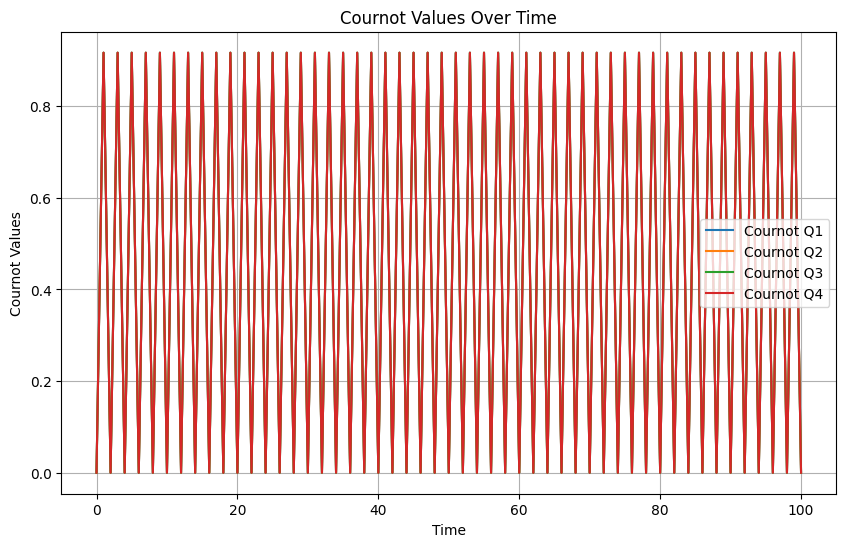

In [4]:
pastItCournotValues1 = [0]
pastItCournotValues2 = [0]
pastItCournotValues3 = [0]
pastItCournotValues4 = [0]
for i in range(0, 100):
    pastItCournotValues1.append(max((d-pastItCournotValues2[i] - pastItCournotValues3[i] - pastItCournotValues4[i]) / (2 *(1+c)), 0))
    pastItCournotValues2.append(max((d-pastItCournotValues1[i] - pastItCournotValues3[i] - pastItCournotValues4[i]) / (2 *(1+c)), 0))
    pastItCournotValues3.append(max((d-pastItCournotValues2[i] - pastItCournotValues1[i] - pastItCournotValues4[i]) / (2 *(1+c)), 0))
    pastItCournotValues4.append(max((d-pastItCournotValues2[i] - pastItCournotValues3[i] - pastItCournotValues1[i]) / (2 *(1+c)), 0))

print(pastItCournotValues1)
print(pastItCournotValues2)
import matplotlib.pyplot as plt

# Plot Cournot values
plt.figure(figsize=(10, 6))
plt.plot(range(len(pastItCournotValues1)), pastItCournotValues1, label='Cournot Q1')
plt.plot(range(len(pastItCournotValues2)), pastItCournotValues2, label='Cournot Q2')
plt.plot(range(len(pastItCournotValues3)), pastItCournotValues3, label='Cournot Q3')
plt.plot(range(len(pastItCournotValues4)), pastItCournotValues4, label='Cournot Q4')
plt.title('Cournot Values Over Time')
plt.xlabel('Time')
plt.ylabel('Cournot Values')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Create the plot
fig = go.Figure()

# Add trace for Cournot Q1
fig.add_trace(go.Scatter(
    x=np.arange(len(pastItCournotValues1)),
    y=pastItCournotValues1,
    mode='lines',
    line=dict(color='blue', width=2),
    marker=dict(symbol='circle', size=8, color='blue'),
    name='Cournot Q1'
))

# Update layout
fig.update_layout(
    xaxis_title='Time',
    yaxis_title='Cournot Values',
    font=dict(size=14),
    legend=dict(font=dict(size=12))
)

# Show plot
fig.show()

In [6]:
c=0.6
pastItCournotValues1 = [0]
pastItCournotValues2 = [0]
pastItCournotValues3 = [0]
pastItCournotValues4 = [0]
for i in range(0, 100):
    pastItCournotValues1.append(max((d-pastItCournotValues2[i] - pastItCournotValues3[i] - pastItCournotValues4[i]) / (2 *(1+c)), 0))
    pastItCournotValues2.append(max((d-pastItCournotValues1[i] - pastItCournotValues3[i] - pastItCournotValues4[i]) / (2 *(1+c)), 0))
    pastItCournotValues3.append(max((d-pastItCournotValues2[i] - pastItCournotValues1[i] - pastItCournotValues4[i]) / (2 *(1+c)), 0))
    pastItCournotValues4.append(max((d-pastItCournotValues2[i] - pastItCournotValues3[i] - pastItCournotValues1[i]) / (2 *(1+c)), 0))


# Create the plot
fig = go.Figure()

# Add trace for Cournot Q1
fig.add_trace(go.Scatter(
    x=np.arange(len(pastItCournotValues1)),
    y=pastItCournotValues1,
    mode='lines',
    line=dict(color='red', width=2),
    marker=dict(symbol='circle', size=8, color='blue'),
    name='Cournot Q1'
))

# Update layout
fig.update_layout(
    xaxis_title='Time',
    yaxis_title='Cournot Values',
    font=dict(size=14),
    legend=dict(font=dict(size=12))
)

# Show plot
fig.show()